<a href="https://colab.research.google.com/github/Shah12345678901/CreditCardDefaulters_Project/blob/main/CreditCardDefaulters_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Objective -The purpose of this project is to predict whether customer is going to default or not based on history of the customer**

**DATASET SOURCE**:https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

**Description of Data**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) PAY_2: Repayment status in August, 2005 (scale same as above) PAY_3: Repayment status in July, 2005 (scale same as above) PAY_4: Repayment status in June, 2005 (scale same as above) PAY_5: Repayment status in May, 2005 (scale same as above) PAY_6: Repayment status in April, 2005 (scale same as above) BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/ML Project/CreditCardDefaulters")

Reading dataset in csv format

In [ ]:
data=pd.read_csv('UCI_Credit_Card.csv')

Exploratory Data Analysis

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#Renaming columns for easy interpretation
data=data.rename(columns={'default.payment.next.month':'default','PAY_0':'PAY_1'})
#Dropping the 'ID' column from dataset as it won't have any significance
data=data.drop(columns=['ID'],axis=1)

In [ ]:
#data.info() function is used to get a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

From above function,we can infer that the 'UCI_Credit_Card.csv' dataset contains 
30,000 observation(rows) and 24 features(columns).The dataset contains all the numerical features ,so no need to do any encoding

In [ ]:
#Identification of null values
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

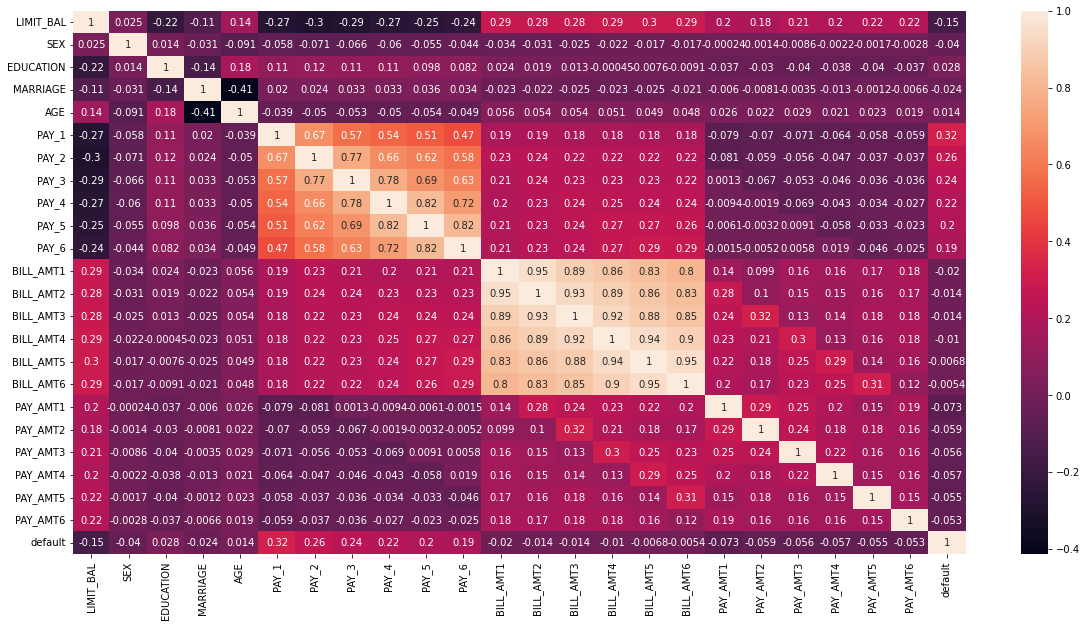

In [ ]:
#checking correlation in data
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)


From this ,we can infer taht linear regression won't do good here as values
are not correated much


In [ ]:
data.describe(percentiles=[0.01,0.25,0.50,0.75,0.99]).T


,count,mean,std,min,1%,25%,50%,75%,99%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,10000.00,50000.00,140000.0,240000.00,500000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,1.00,2.0,2.00,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,1.00,2.0,2.00,5.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,1.00,2.0,2.00,3.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,22.00,28.00,34.0,41.00,60.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-2.00,-1.00,0.0,0.00,3.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-2.00,-1.00,0.0,0.00,3.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-2.00,-1.00,0.0,0.00,3.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-2.00,-1.00,0.0,0.00,3.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-2.00,-1.00,0.0,0.00,3.00,8.0


If we will see in PAY_1 to PAy_6 var,they have min=-1 which should not ,it should be -1 acc to meta data and 50% is 0 which is also shuld not happpen it could be happen because of imputation of nan is done already


for BILL_AMT, min value is -ive ,it should not

so we have to do something to bring data in cleaner and appropriate format

so,we will convert all-ive and '0' values 

In [ ]:
#outlier deection function to detect outliers rows on the basis of 1.5 IQR 
#this will check how many values are coming as outliers in all rows ,this code will show having outliers atleast in one column

from collections import Counter 

def detect_outliers(df,features):
  outlier_indices=[]
  for c in features:
    #1st quartile
    Q1=np.percentile(df[c],25)
    #3rd quartile
    Q3=np.percentile(df[c],75)
    #IQR
    IQR=Q3-Q1
    #outlier step
    outlier_step=IQR *1.5
    #detect outlier and their indices
    outlier_list_col=df[(df[c]<Q1-outlier_step) |   (df[c]>Q3+outlier_step)].index
    #store indices
    outlier_indices.extend(outlier_list_col)

  outlier_indices=Counter(outlier_indices)
  multiple_outliers=list(i for i,v in outlier_indices.items() if v>0)  #v>0 shows at least one column has outliers

  return multiple_outliers


                            



In [ ]:
data.iloc[detect_outliers(data,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,320000.0,1,1,1,49,0,0,0,-1,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,280000.0,1,2,1,40,0,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,360000.0,1,1,2,33,0,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,180000.0,2,2,1,34,0,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29491,320000.0,1,1,2,31,1,-2,-2,-2,-2,...,-50616.0,-53007.0,-94625.0,185.0,28.0,12.0,208.0,8.0,14.0,1
29494,320000.0,1,1,2,34,0,0,0,0,0,...,104795.0,113156.0,121465.0,19246.0,11550.0,11688.0,12122.0,12156.0,2437.0,0
29739,450000.0,1,2,1,43,0,0,0,0,0,...,67875.0,58328.0,252696.0,6000.0,4000.0,4000.0,7000.0,215000.0,3000.0,0
29903,260000.0,1,1,1,30,-1,0,-1,-1,-1,...,99.0,99.0,172104.0,10018.0,13333.0,99.0,99.0,172104.0,30013.0,0


Above all execution shows that in these 6 columns,3767 rows having outliers,means 3767 out of 30,000 ~12% outliers-significant value so can't remove outlier, can't do cap-floor, one more reason of not doing it -  this is banking domain ,and there is LIMIT_BAL=99%-5000,000 max 1000,0000 whch is high difference ,there could be a premium customer whose limiy_bal is large as this which can pay a significant role so removing this could result in loss of info

Univariate Analysis

In [ ]:
#numerical values frequency distribution


def plot_hist(variable):
  plt.figure(figsize=(9,3))
  plt.hist(data[variable],bins=50)
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title(f"{variable} distribution with hist")

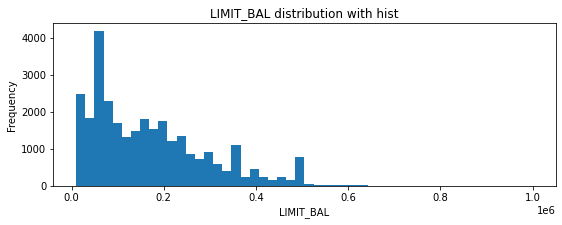

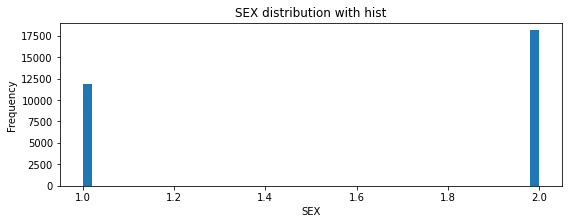

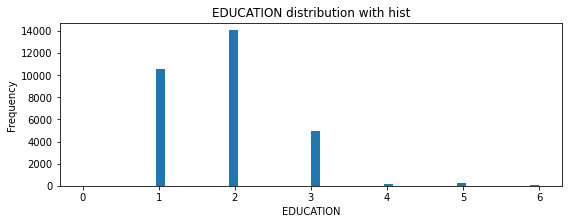

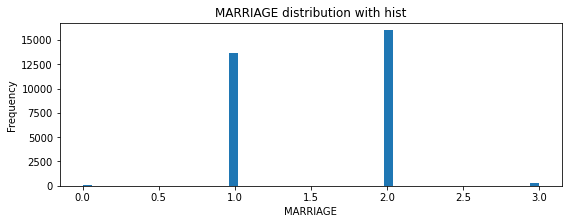

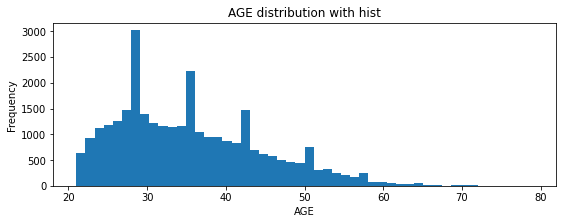

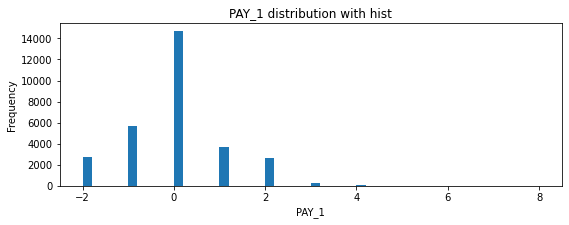

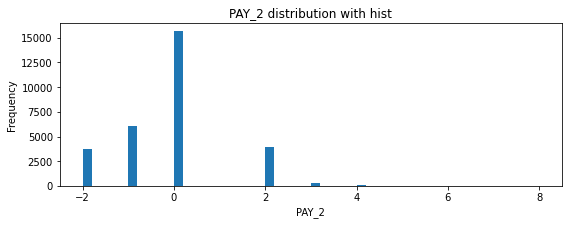

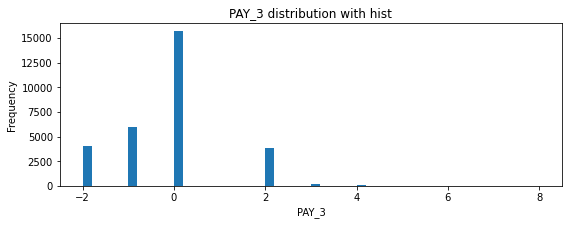

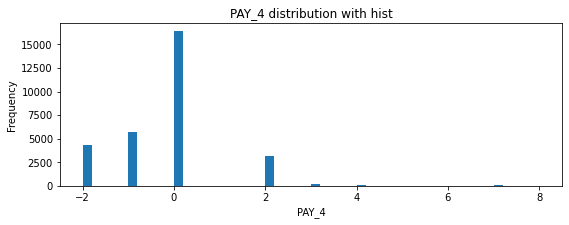

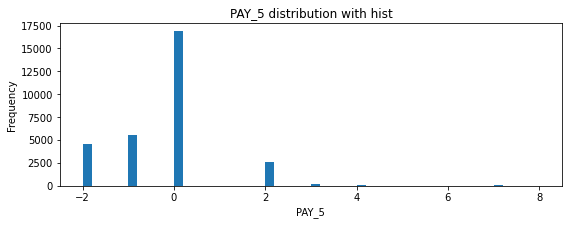

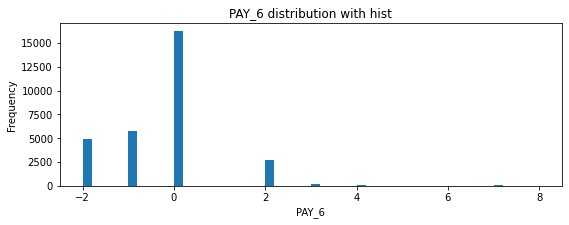

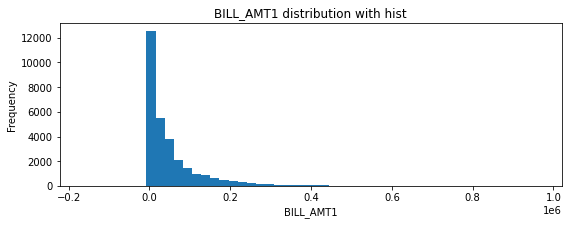

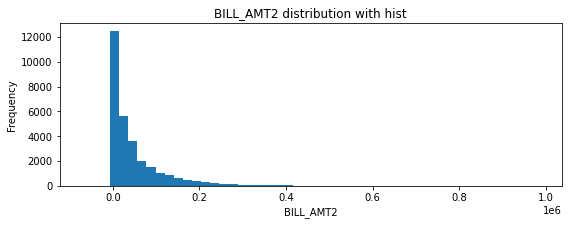

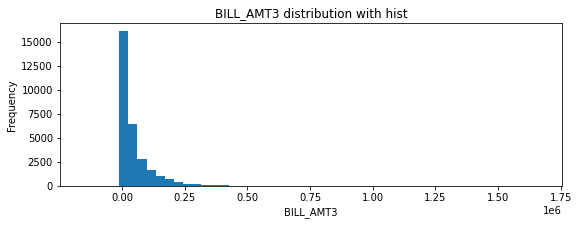

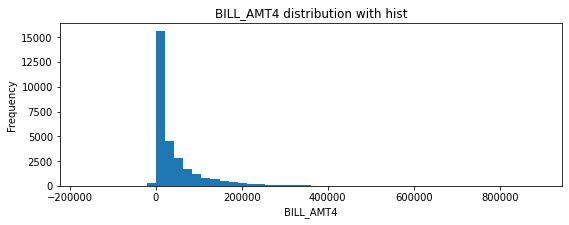

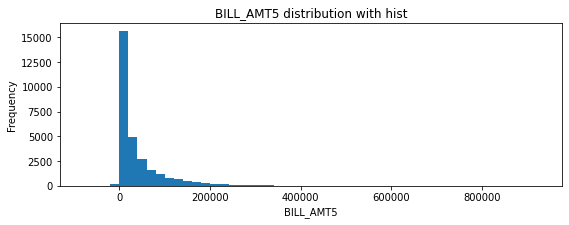

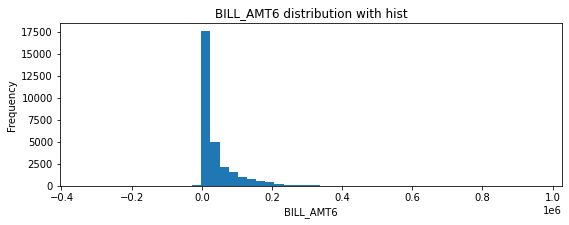

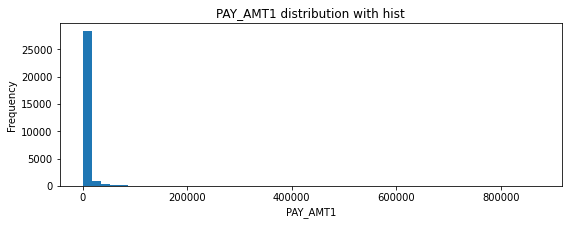

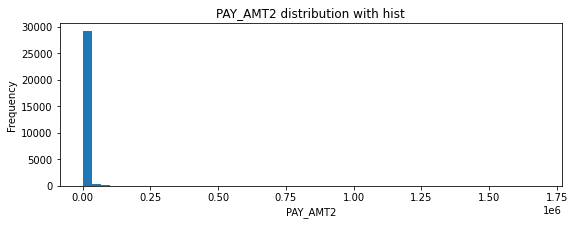

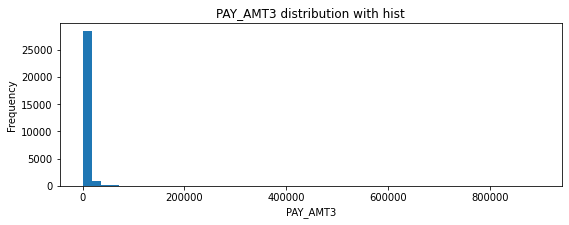

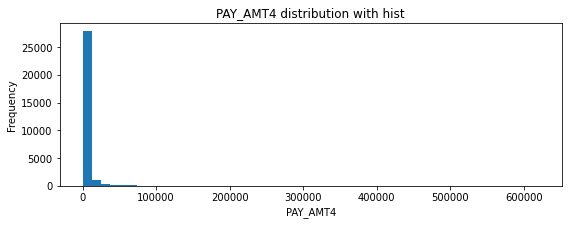

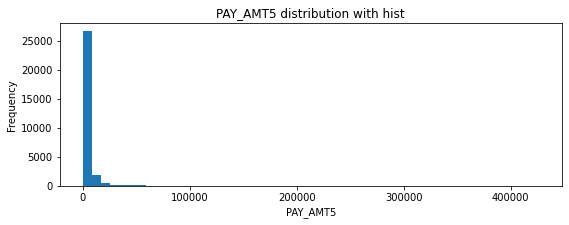

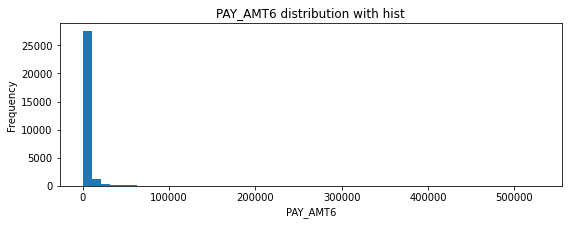

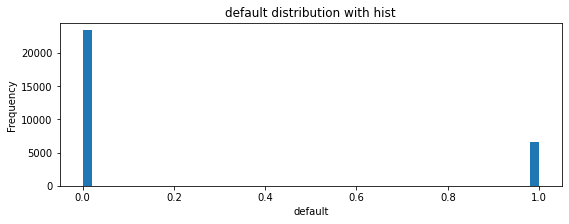

In [ ]:
numericalVar=data.columns
for i in numericalVar:
  plot_hist(i)

In [ ]:
#checking unbalnced dataset
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

This function shows this is highly unbalnced data

Data cleaning

In [ ]:
#Replacing '0' and '-2' with '-1' ,as we can see from metadata that '-1' indicates for 'pay duly' and there is no indication for values '0' and '-2' so we are considering it as '-1'

data['PAY_1']=data['PAY_1'].replace([0,-2],-1)
data['PAY_2']=data['PAY_1'].replace([0,-2],-1)
data['PAY_3']=data['PAY_1'].replace([0,-2],-1)
data['PAY_4']=data['PAY_1'].replace([0,-2],-1)
data['PAY_5']=data['PAY_1'].replace([0,-2],-1)
data['PAY_6']=data['PAY_1'].replace([0,-2],-1)

In [ ]:
#defining a function to check the dependencies of the columns on default
def corr_2_cols(col1,col2):
  res=data.groupby([col1,col2]).size().unstack()
  return res

In [ ]:
corr_2_cols('EDUCATION', 'default')

default,0,1
EDUCATION,,
0,14.0,NaN
1,8549.0,2036.0
2,10700.0,3330.0
3,3680.0,1237.0
4,116.0,7.0
5,262.0,18.0
6,43.0,8.0


In [ ]:
#EDUCATION :(1=graduate school,2=unversity,3=high school,4=others,5=unknown,6=unknown)
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Replacing '0', '5' and '6' values in an 'Education' column by '4' to get an enough distribution in column '4'
# As '4', '5' and '6' values has no significance, can see from meta data and '0' is also not useful value so replacing 
# all these with '4'
data['EDUCATION']=data['EDUCATION'].replace([0,5,6],4)

In [ ]:
#checking values in a coloumn in 'EDUCATION' after replacement
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
corr_2_cols('MARRIAGE','default')

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [ ]:
#MARRIAGE:Martial status (1:married,2:single,3=others).'0' has no meaning so replacing it with the 3
data['MARRIAGE']=data['MARRIAGE'].replace([0],3)

In [ ]:
#Checking values in column 'MARRAIGE' after replacement
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
corr_2_cols('SEX','default')

default,0,1
SEX,,
1,9015,2873
2,14349,3763


Feauture Engineering

BILL_AMT_AVG_Last6m- Average of Bill Amounts of last 6 months, PAY_AMT_AVG_Last6m- Average of previous payments of last 6 months, Max_Pay_Last6m- Maximum value of previous payments, Max_Bill_Amt_Last6m- Maximum value of Bill Amounts,  Credit Utilization Ratio- Maintaining a good credit utilization is important if you want to build and maintain a good creditscore. As your credit utilization increases, your credit score can go down. A high credit utilization indicates that you'reprobably spending a significant portion of your monthly income on debt payments, and this puts you at a higher risk of defaulting on your payments (at least in the eyes of creditors).

In [ ]:
data['BILL_AMT_AVG_Last6m']=(data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6'])/6
data['PAY_AMT_AVG_Last6m']=(data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6'])/6

data['Max_Pay_Last6m']=data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].max(axis=1)
data['Max_Bill_Amt_Last6m']=data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].max(axis=1)


data['Credit Utilization Ratio']= data['BILL_AMT_AVG_Last6m']/data['LIMIT_BAL']


In [ ]:
#Checking data after adding features
data.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,BILL_AMT_AVG_Last6m,PAY_AMT_AVG_Last6m,Max_Pay_Last6m,Max_Bill_Amt_Last6m,Credit Utilization Ratio
0,20000.0,2,2,1,24,2,2,2,2,2,...,0.0,0.0,0.0,0.0,1,1284.000000,114.833333,689.0,3913.0,0.064200
1,120000.0,2,2,2,26,-1,-1,-1,-1,-1,...,1000.0,1000.0,0.0,2000.0,1,2846.166667,833.333333,2000.0,3455.0,0.023718
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,1000.0,1000.0,1000.0,5000.0,0,16942.166667,1836.333333,5000.0,29239.0,0.188246
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,...,1200.0,1100.0,1069.0,1000.0,0,38555.666667,1398.000000,2019.0,49291.0,0.771113


In [ ]:
#checking shape of the data
data.shape

(30000, 29)

Dividing data into dependent and independent features 

In [ ]:
X=data.drop(['default'],axis=1)
y=data[['default']]

Scaling dataframe by Standard scaling to get scaled values

In [ ]:
from sklearn.preprocessing import StandardScaler
stdc=StandardScaler()
X_std=pd.DataFrame(stdc.fit_transform(X),index=X.index,columns=X.columns)

In [ ]:
#checking scaled dataset
X_std.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_AVG_Last6m,PAY_AMT_AVG_Last6m,Max_Pay_Last6m,Max_Bill_Amt_Last6m,Credit Utilization Ratio
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.436569e-17,-1.597606e-14,6.817554e-15,7.833586e-15,-7.286024e-17,1.329770e-15,1.329770e-15,1.329770e-15,1.329770e-15,1.329770e-15,...,-3.368787e-16,-1.300675e-15,-1.950606e-16,-2.968200e-16,-5.318801e-17,-3.651061e-17,1.792029e-16,1.299849e-16,7.263634e-18,4.742133e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213794e+00,-1.234323e+00,-1.131346e+00,-1.068797e+00,-1.571479e+00,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,...,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,-1.596912e+00,-5.203539e-01,-4.177961e-01,-8.494701e-01,-1.721129e+00
25%,-9.054983e-01,-1.234323e+00,-1.131346e+00,-1.068797e+00,-8.120745e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,...,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,-6.354066e-01,-4.105378e-01,-3.598517e-01,-6.442625e-01,-9.748976e-01
50%,-2.118326e-01,8.101607e-01,2.118699e-01,8.491306e-01,-1.611565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,...,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,-3.782048e-01,-2.838951e-01,-2.859845e-01,-3.745233e-01,-2.506903e-01
75%,5.589071e-01,8.101607e-01,2.118699e-01,8.491306e-01,5.982479e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,-5.111565e-01,...,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,1.917094e-01,3.044894e-02,-9.881204e-02,2.426749e-01,8.948435e-01
max,6.416528e+00,8.101607e-01,2.898301e+00,2.767058e+00,4.720729e+00,7.365806e+00,7.365806e+00,7.365806e+00,7.365806e+00,7.365806e+00,...,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.315747e+01,6.136149e+01,4.398318e+01,2.045210e+01,1.418439e+01


Train test splitting on dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=42)

Applying Logistic Regression on  dataset





In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(logreg.score(X_train,y_train))
logreg.score(X_test,y_test)

0.8184444444444444


0.8184

In [ ]:
y_pred_log=logreg.predict(X_test)

Accuracy 0.8184
Precision 0.6641883519206939
Recall_score 0.32944068838352797
f1_score 0.4404272801972063
Average 10-Fold CV Score:0.7792
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.33      0.44      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500



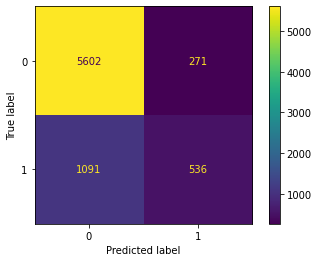

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print("Accuracy",metrics.accuracy_score(y_test,y_pred_log))
print("Precision",metrics.precision_score(y_test,y_pred_log))
print("Recall_score",metrics.recall_score(y_test,y_pred_log))
print("f1_score",metrics.f1_score(y_test,y_pred_log))

#score with 10-fold cross validation
k_fold_score=cross_val_score(logreg,X,y,cv=10)

#Find accuracy after 10-Fold cross validation

print("Average 10-Fold CV Score:{}".format(round(np.mean(k_fold_score),4)))

print(classification_report(y_test,y_pred_log))

metrics.plot_confusion_matrix(logreg,X_test,y_test)

Applying Random Forest Classifier on  dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_depth=4, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [ ]:
feature_importances=pd.DataFrame(rf.feature_importances_,index=X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
PAY_6,0.165017
PAY_5,0.146701
PAY_4,0.138438
PAY_2,0.133108
PAY_3,0.130832
PAY_1,0.130422
PAY_AMT_AVG_Last6m,0.021413
PAY_AMT1,0.017089
Credit Utilization Ratio,0.014169
LIMIT_BAL,0.012707


In [ ]:
y_pred=rf.predict(X_test)

Accuracy: 0.8198666666666666
Precision 0.6864864864864865
Recall 0.31223110018438843
f1_score 0.4292353189691593
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5873
           1       0.69      0.31      0.43      1627

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



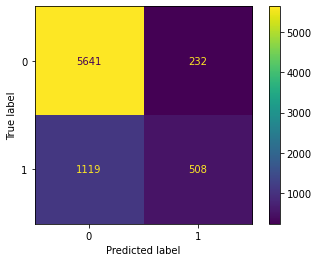

In [ ]:
# Evaluation metrics for Random Forest
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))  
print("f1_score",metrics.f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [ ]:
# XGBoost 
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_train,y_train)

XGBClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred_XGB_us=xgb_model.predict(X_test) 

Accuracy: 0.8206666666666667
Precision 0.6682577565632458
Recall 0.3441917639827904
f1_score: 0.4543610547667342


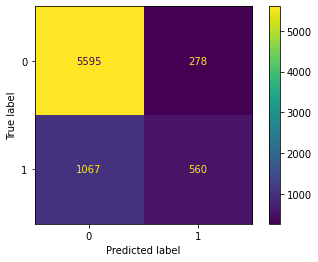

In [ ]:
# Evaluating XGBoosting Classification model 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_XGB_us))
print("Precision",metrics.precision_score(y_test,y_pred_XGB_us))
print("Recall",metrics.recall_score(y_test,y_pred_XGB_us))
print("f1_score:", metrics.f1_score(y_test, y_pred_XGB_us))
metrics.plot_confusion_matrix(xgb_model,X_test,y_test)

After applying various algorithms, I concluded that XGBOOST  gave maximum accuracy of 82%
This model is able to make prediction with 82% accuracy